Import libraries

In [127]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

Delta rule

In [34]:
n_epochs = 20
lr = 0.001
patterns = np.array([
    [-1, -1, 1],
    [ 1, -1, 1],
    [-1,  1, 1],
    [ 1,  1, 1],
])
targets = np.array([-1, 1, 1, -1])

def init_weights(mu, sigma, size) -> np.ndarray:
    weights = np.random.normal(mu, sigma, size)
    return weights

mu, sigma = 0, 0.1
weights = init_weights(mu, sigma, patterns.shape[1])

In [35]:
print(patterns.dot(weights))

[ 0.36406335  0.21200548 -0.01479396 -0.16685183]


In [36]:
def delta_rule(patterns, targets, weights, lr):
    delta_weights = -lr*(patterns.dot(weights) - targets).dot(patterns)
    return delta_weights

delta_weights = delta_rule(patterns, targets, weights, lr)

In [37]:
print(delta_weights)

[ 0.00030412  0.00075771 -0.00039442]


In [41]:
for epoch in range(n_epochs):
    # print(f'Computing epoch {epoch}')
    delta_weights = delta_rule(patterns, targets, weights, lr)
    weights += delta_weights
output = patterns.dot(weights)
print(f'Learned patterns: {output}')

Learned patterns: [ 0.28624458  0.16668917 -0.01163174 -0.13118714]


Generation of linearly-separable data

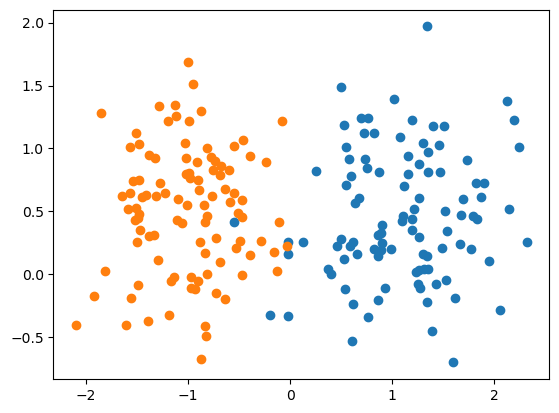

In [87]:
# Define constants
n_points = 100
dim = 2
muA, sigmaA = [1, 0.5], 0.5
muB, sigmaB = [-1, 0.5], 0.5

# Generate sample data based on normal distribution
def sample_data(n_points, dim, mu, sigma):
    size = (n_points, dim)
    points = np.random.normal(mu, sigma, size)
    
    # add ones for bias
    points = np.hstack((points, np.ones((n_points, 1))))
    return points

classA = sample_data(n_points, dim, muA, sigmaA)
classB = sample_data(n_points, dim, muB, sigmaB)

plt.scatter(classA[:, 0], classA[:, 1])
plt.scatter(classB[:, 0], classB[:, 1])
plt.show()

In [165]:
def delta_weights_batch(X, T, W, lr):
    delta_W = -lr*(X.dot(W) - T).dot(X)
    return delta_W

def delta_weights_seq(x, t, W, lr):
    delta_W = -lr*(x.dot(W) - t) * (x)
    return delta_W

def sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1 + z)
    return sig

def perceptron_weights_seq(x, t, W, lr):
    delta_W = -lr*(sigmoid(x.dot(W)) - t) * (x)
    return delta_W

def plot_points_and_boundary(classA, classB, w):
    
    fig, ax = plt.subplots()
    
    ax.scatter(classA[:, 0], classA[:, 1])
    ax.scatter(classB[:, 0], classB[:, 1])
    
    # plot decision boundary
    X = np.vstack((classA, classB))
    
    plot_min = np.min(X, axis=0)
    plot_max = np.max(X, axis=0)
    
    ax.set_xlim([plot_min[0], plot_max[0]])
    ax.set_ylim([plot_min[1], plot_max[0]])
    
    x = np.linspace(-5, 5, 100)
    y = (w[0] * x + w[2])/w[1]
    ax.plot(x, y, 'r')
    
    
    display(fig)    
    clear_output(wait = True)
    # plt.pause(0.001)
    

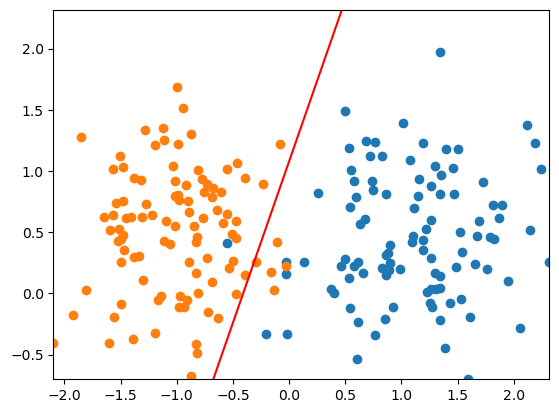

In [ ]:
X = np.vstack((classA, classB))
T = np.hstack((-np.ones(n_points), np.ones(n_points)))

mu, sigma = 0, 0.1
W_init = init_weights(mu, sigma, X.shape[1])

# print(W)

lr = 0.001

def delta_rule_batch(n_epochs, X, T, W, lr):
    for epoch in range(n_epochs):
        delta_W = delta_weights_batch(X, T, W, lr)
        W += delta_W
        plot_points_and_boundary(classA, classB, W)
    return W
        

def delta_rule_seq(n_epochs, X, T, W, lr):
    for epoch in range(n_epochs):
        for x, t in zip(X, T):
            delta_W = delta_weights_seq(x, t, W, lr)
            W += delta_W
            plot_points_and_boundary(classA, classB, W)
    return W

def perceptron_seq(n_epochs, X, T, W, lr):
    for epoch in range(n_epochs):
        for x, t in zip(X, T):
            delta_W = perceptron_weights_seq(x, t, W, lr)
            W += delta_W
            plot_points_and_boundary(classA, classB, W)
    return W

# W_batch = delta_rule_batch(n_epochs, X, T, W_init, lr)
# W_seq = delta_rule_seq(n_epochs, X, T, W_init, lr)
W_seq = perceptron_seq(n_epochs, X, T, W_init, lr)

print(W_batch)
print(W_seq)
# output = X.dot(W)
# print(f'Learned patterns: {output}')

In [70]:
print([np.ones(n_points)])

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
